In [83]:
import matplotlib.pyplot as plt
import numpy as np
x=np.genfromtxt('C:\\Users\\yoges\\Downloads\\newdata.csv',delimiter=' ')

In [84]:
x=x[1:,:]
d=x[:,-1]
A=x[:,:-1].tolist()
V=[]
W=[]
C=[]
theta=0.3
delta=1

# Expantion:-

In [85]:
def expand(p,m):
    if(len(V)!=0):
        for i in range(0,len(V)):
            if(V[i][0]<=p[0] and V[i][1]<=p[1] and C[i]==d[m]):
                if(W[i][0]>=p[0] and W[i][1]>=p[1]):
                    print("Given point lies inside the hyperBox")
                    return 0
    return exp_criteria(p,m) 

# Expantion criteria:-

In [86]:
def exp_criteria(p,m):
    for j in range(0,len(V)):
        temp=0
        for i in range(0,2):
            temp=temp+(max(W[j][i],p[i])-min(V[j][i],p[i]))
            #print("This is a message : ",(max(W[j][i],p[i]),min(V[j][i],p[i])))
        if(2*theta>=temp and C[j]==d[m]):
            print("Exp.crit. satisfied")
            print("Old min-max are-",V,"to",W)
            x=[]
            y=[]
            for k in range(0,2):
                x.append(min(V[j][k],p[k]))
                y.append(max(W[j][k],p[k]))
            if(x):
                V[j]=x
            if(y):
                W[j]=y
            print("New min-max are-",V,"to",W)
            return overlap_test()
        print("Exp.crit. is not satisfied")
    V.append(p)
    W.append(p)
    C.append(d[m])
    print("This is the new h.Box",V,"&",W)
    return 0
        

# Overlap test:-

In [87]:
def overlap_test():
    w=[0,0]
    v=[0,0]
    temp=delta=1
    for k in range(0,len(V)):
        for j in range(0,len(V)):
            if(k==j):
                continue
            for i in range(0,2):
                if(V[j][i]<V[k][i]<W[j][i]<W[k][i]):
                    delta=min(delta,(W[j][i]-V[k][i]))
                    q=1
                if(V[k][i]<V[j][i]<W[k][i]<W[j][i]):
                    delta=min(delta,(W[k][i]-V[j][i]))
                    q=2
                if(V[j][i]<V[k][i]<W[k][i]<W[j][i]):
                    delta=min(delta,min((W[j][i]-V[k][i]),(W[k][i]-V[j][i])))
                    q=3
                if(V[k][i]<V[j][i]<W[j][i]<W[k][i]):
                    delta=min(delta,min((W[j][i]-V[k][i]),(W[k][i]-V[j][i])))
                    q=3
                if(delta!=temp):
                    temp=delta
                    t=i
            if(delta!=1):
                print("overapping hyperboxes :",k,"&",j)
                return contract(q,t,k,j)

# Contraction:-

In [88]:
def contract(c,i,k,j): 
    if(c==1):
        V[k][i]=W[j][i]=(V[k][i]+W[j][i])/2
    if(c==2):
        V[j][i]=W[k][i]=(V[j][i]+W[k][i])/2
    if(c==3):
        if((W[j][i]-V[k][i])<(W[k][i]-V[j][i])):
            W[j][i]=V[k][i]
        else:
            V[j][i]=W[k][i] 
    if(c==4):
        if((W[k][i]-V[j][i])<(W[j][i]-V[k][i])):
            W[k][i]=V[j][i]
        else:
            V[k][i]=W[j][i]
    print("--------after contraction---------")
    print("New min-max are-",V,"to",W)
    return 1;    
            

# Main function:-

In [89]:
p=[0,0]
for i in range(0,len(A)):
    p=expand(A[i],i)
    print(p)

This is the new h.Box [[0.43602399117606827, 0.4157757274892156]] & [[0.43602399117606827, 0.4157757274892156]]
0
Exp.crit. satisfied
Old min-max are- [[0.43602399117606827, 0.4157757274892156]] to [[0.43602399117606827, 0.4157757274892156]]
New min-max are- [[0.43602399117606827, 0.4157757274892156]] to [[0.4394528077596546, 0.5478674292772121]]
None
Exp.crit. satisfied
Old min-max are- [[0.43602399117606827, 0.4157757274892156]] to [[0.4394528077596546, 0.5478674292772121]]
New min-max are- [[0.3917587782134365, 0.4157757274892156]] to [[0.4394528077596546, 0.6103473035285875]]
None
Exp.crit. satisfied
Old min-max are- [[0.3917587782134365, 0.4157757274892156]] to [[0.4394528077596546, 0.6103473035285875]]
New min-max are- [[0.2995329322777752, 0.4157757274892156]] to [[0.4394528077596546, 0.6230627270405613]]
None
Exp.crit. satisfied
Old min-max are- [[0.2995329322777752, 0.4157757274892156]] to [[0.4394528077596546, 0.6230627270405613]]
New min-max are- [[0.2995329322777752, 0.4157

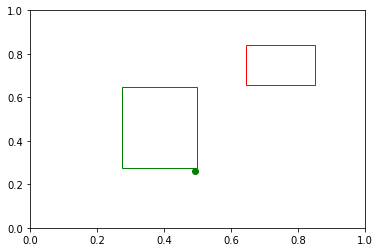

In [90]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
c=['r','g']
plt.xlim(0,1)
plt.ylim(0,1)
currentAxis = plt.gca()
for i in range(len(V)):
    if(V[i]==W[i]):
        plt.scatter(V[i][0],V[i][1],color=c[int(C[i])-1])
    else:
        currentAxis.add_patch(Rectangle((V[i][0], V[i][1]), W[i][0]-V[i][0],W[i][1]-V[i][1],alpha=1,fill=None,edgecolor=c[int(C[i])-1]))                
plt.show()